# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data
training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training images =", n_train)
print("Number of validation images =", n_validation)
print("Number of testing images =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training images = 34799
Number of validation images = 4410
Number of testing images = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(X, end, total, images_per_row = 30, images_per_col = 15,
                H = 20, W = 1, its_gray = False):    
    number_of_images = images_per_row * images_per_col
    figure, axis = plt.subplots(images_per_col, images_per_row, figsize=(H, W))
    figure.subplots_adjust(hspace = .2, wspace=.001)
    axis = axis.ravel()
    
    for i in range(number_of_images):
        index = np.random.randint(end - total, end - 1)
        image = X[index]
        axis[i].axis('off')
        if its_gray:
          axis[i].imshow(image.reshape(32, 32), cmap='gray')
        else:
          axis[i].imshow(image)
        

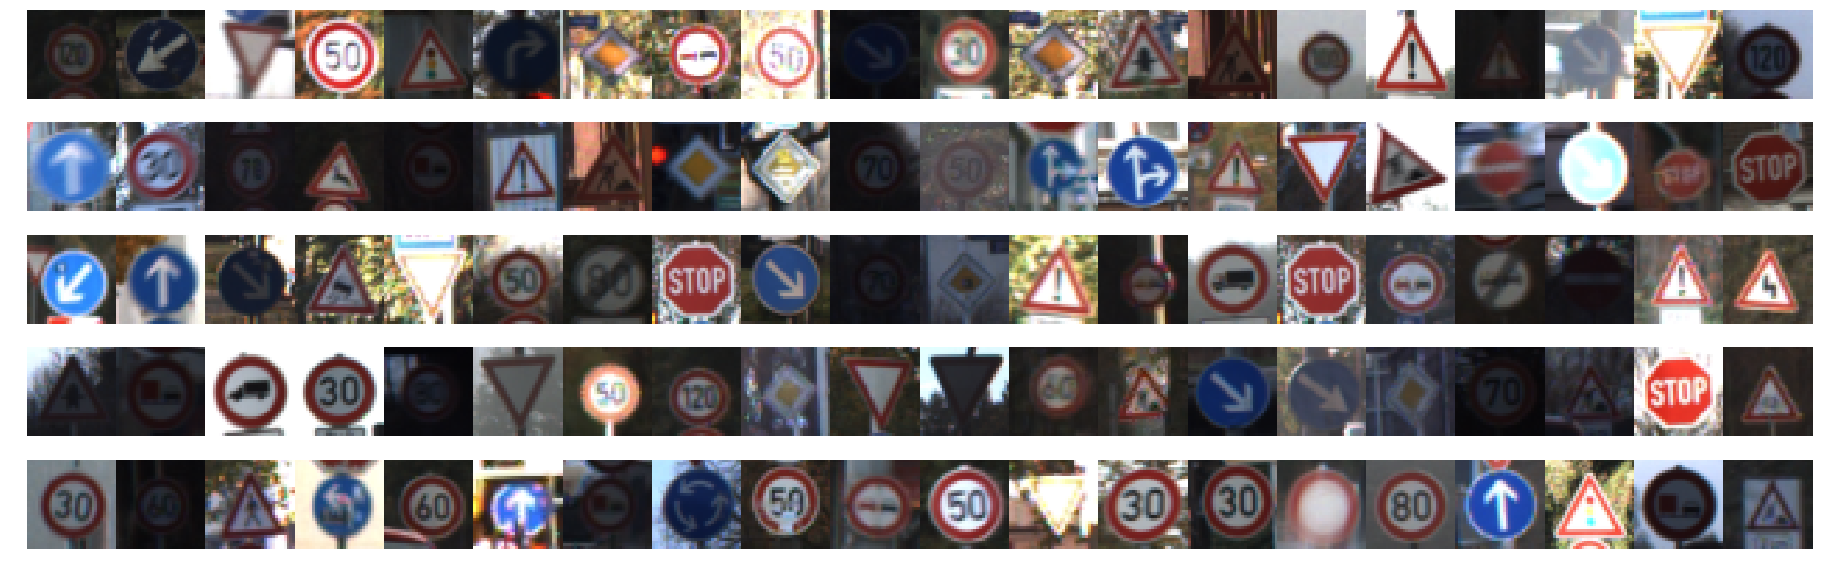

In [4]:
show_images(X_train, len(X_train), len(X_train), 
            images_per_row = 20, images_per_col = 5, 
            H = 32, W = 10)

### Data Set Summary

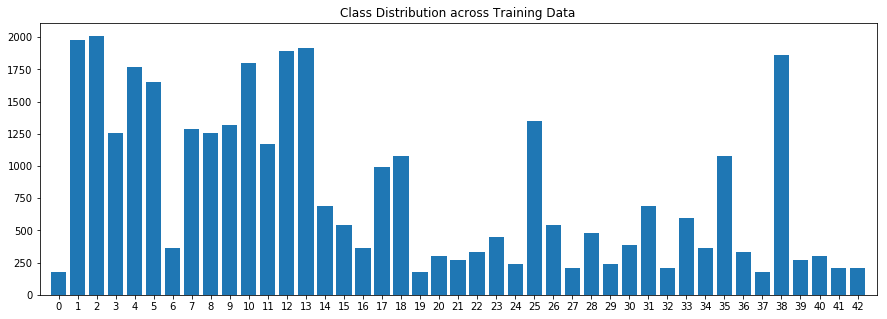

In [5]:
# Count frequency of each label
labels, counts = np.unique(y_train, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
plt.title('Class Distribution across Training Data')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
#print("Using OpenCV version: %s" % (cv2.__version__))

#auto correction technique
def auto_contrast(img):
    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8, 8))

    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels

    l2 = clahe.apply(l)  # apply CLAHE to the L-channel

    lab = cv2.merge((l2, a, b))  # merge channels
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)  # convert from LAB to RGB
    return img2

def resize(image):
    return cv2.resize(image, (32, 32))

def image_preprocess(image):
    image = resize(image)
    image = auto_contrast(image)
    return image

In [7]:
# Pre-processing on (training, test, validation sets)
X_train = np.array([image_preprocess(x) for x in X_train])
X_valid = np.array([image_preprocess(x) for x in X_valid])
X_test = np.array([image_preprocess(x) for x in X_test])

### Question 1
Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

### Answer:
After plotting some images from the dataset it is observed that the certain amount of images are either too dark or too bright. Because of this an open cv based auto contrast correction technique has applied as preprocessing. Also, as required for the network, all images are resized to 32x32 size. This step is also considered as part of preprocessing.

My preprocessing pipeline is as follows:
1. Resize the image to 32x32
2. Apply auto contrast adjustment

Preprocessing results are plotted below,


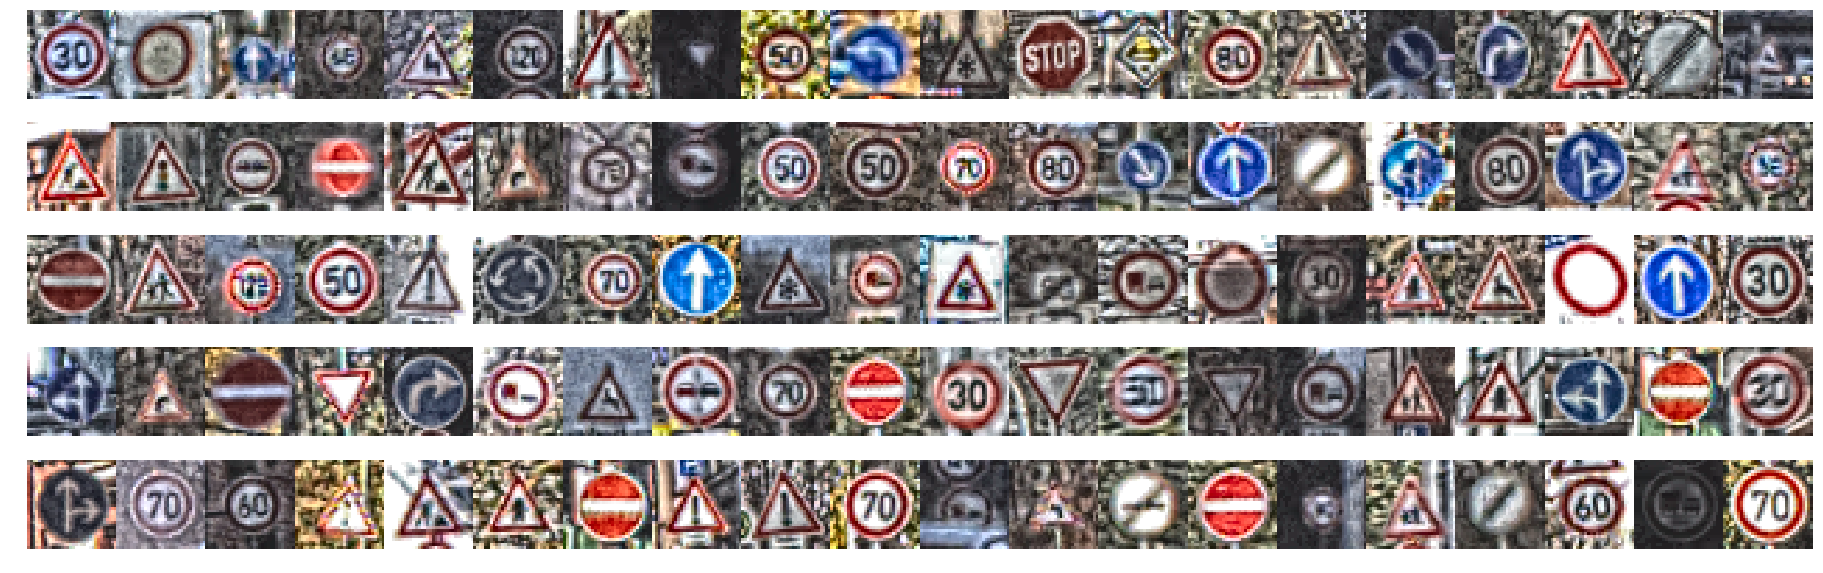

In [8]:
show_images(X_train, len(X_train), len(X_train), 
            images_per_row = 20, images_per_col = 5, 
            H = 32, W = 10, its_gray=False)

### Model Architecture

In [9]:
def preprocess_op(x):
    p0 = tf.image.convert_image_dtype(x, tf.float32)
    p0 = tf.divide(tf.subtract(p0, 127.5), 127.5)
    return p0

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
#print("Using TensorFlow version: %s" % (tf.__version__))

def LeNet(x, keep_prob=1.0):
    mu = 0
    sigma = 0.1
    
    print("LeNet!")
    
    p0 = preprocess_op(x)
    
    # C1: Input 32x32x3, Output: 28x28x6
    weight1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    bias1 = tf.Variable(tf.zeros(shape=(6)))
    conv1 = tf.nn.conv2d(p0, weight1, strides=(1, 1, 1, 1), padding='VALID')
    conv1 = tf.add(conv1, bias1)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)
    print("C1: Input %s Output %s" % (x.get_shape(), conv1.get_shape()))

    # P2 Input 28x28x6, Output: 14x14x6
    pool1 = tf.nn.max_pool(conv1, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')
    print("P2: Input %s Output %s" % (conv1.get_shape(), pool1.get_shape()))

    # C3 Input 14x14x6, Output: 10x10x16
    weight2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    bias2 = tf.Variable(tf.zeros(shape=(16)))
    conv2 = tf.nn.conv2d(pool1, weight2, strides=(1, 1, 1, 1), padding='VALID')
    conv2 = tf.add(conv2, bias2)
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob=keep_prob)
    print("C3: Input %s Output %s" % (pool1.get_shape(), conv2.get_shape()))

    # P4 Input 10x10x16, Output 5x5x16
    pool2 = tf.nn.max_pool(conv2, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')
    print("P4: Input %s Output %s" % (conv2.get_shape(), pool2.get_shape()))
    
    # C5: Input 5x5x16, Output 1x120
    fc1 = tf.contrib.layers.flatten(pool2)
    weight3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    bias3 = tf.Variable(tf.zeros(shape=(120)))
    fc1 = tf.matmul(fc1, weight3)
    fc1 = tf.add(fc1, bias3)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    print("C5: Input %s Output %s" % (pool2.get_shape(), fc1.get_shape()))

    # F6 Input 1x120, Output 1x84
    weights4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    bias4 = tf.Variable(tf.zeros(shape=(84)))
    fc2 = tf.matmul(fc1, weights4)
    fc2 = tf.add(fc2, bias4)
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)
    print("F6: Input %s Output %s" % (fc1.get_shape(), fc2.get_shape()))

    # F7 Input 1x84, Output 1x10
    weight5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    bias5 = tf.Variable(tf.zeros(shape=(43)))
    logits = tf.matmul(fc2, weight5)
    logits = tf.add(logits, bias5)
    print("F7: Input %s Output %s" % (fc2.get_shape(), logits.get_shape()))

    return logits

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Question 2
Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

### Answer:

My final model consist of the following layers:

|    Layer       |  Input  |  Output    |
|----------------|:-------:|:--------:  |
| Input          |32x32x3  |            |   
| Convolution    |32x32x3  |28x28x6     |
| Relu           |         |            |
| Dropout        |         |            |
| Max Pooling    |28x28x6  |14x14x6     |
| Convolution    |14x14x6  |10x10x16    |
| Relu           |         |            |
| Dropout        |         |            |
| Max Pooling    |10x10x16 |5x5x16      |
| Convolution    |5x5x16   |120(flatten)|
| Relu           |         |            |
| Dropout        |         |            |
| Fully Connected|120      |84          |
| Relu           |         |            |
| Dropout        |         |            |
| Fully Connected|84       |43          |


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
height, width, channels = X_train[0].shape
x = tf.placeholder(tf.float32, shape=(None, height, width, channels))
y = tf.placeholder(tf.int32, shape=(None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [13]:
rate = 0.001

logits = LeNet(x, keep_prob) 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
loss_operations = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operations)

LeNet!
C1: Input (?, 32, 32, 3) Output (?, 28, 28, 6)
P2: Input (?, 28, 28, 6) Output (?, 14, 14, 6)
C3: Input (?, 14, 14, 6) Output (?, 10, 10, 16)
P4: Input (?, 10, 10, 16) Output (?, 5, 5, 16)
C5: Input (?, 5, 5, 16) Output (?, 120)
F6: Input (?, 120) Output (?, 84)
F7: Input (?, 84) Output (?, 43)


In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operations], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

### Question 3
Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

### Answer:
Following are the parameters that I have used to train my model:
1. Learning Rate = **0.001**
2. Number of Epochs = **30**
3. Batch Size = **128**
4. Optimizer = **Adam Optimizer**

In [15]:
EPOCHS = 30
BATCH_SIZE = 128

In [16]:
### Calculate and report the accuracy on the training and validation set.
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy, training_loss = evaluate(X_train, y_train)
        validation_accuracy, validation_loss = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f} Loss = {:.3f}".format(training_accuracy, training_loss))
        print("Validation Accuracy = {:.3f} Loss = {:.3f}".format(validation_accuracy, validation_loss))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.557 Loss = 2.024
Validation Accuracy = 0.514 Loss = 2.086

EPOCH 2 ...
Training Accuracy = 0.738 Loss = 1.407
Validation Accuracy = 0.707 Loss = 1.474

EPOCH 3 ...
Training Accuracy = 0.816 Loss = 1.072
Validation Accuracy = 0.796 Loss = 1.140

EPOCH 4 ...
Training Accuracy = 0.869 Loss = 0.866
Validation Accuracy = 0.829 Loss = 0.943

EPOCH 5 ...
Training Accuracy = 0.905 Loss = 0.711
Validation Accuracy = 0.864 Loss = 0.806

EPOCH 6 ...
Training Accuracy = 0.921 Loss = 0.612
Validation Accuracy = 0.893 Loss = 0.698

EPOCH 7 ...
Training Accuracy = 0.925 Loss = 0.531
Validation Accuracy = 0.904 Loss = 0.608

EPOCH 8 ...
Training Accuracy = 0.937 Loss = 0.476
Validation Accuracy = 0.917 Loss = 0.552

EPOCH 9 ...
Training Accuracy = 0.943 Loss = 0.437
Validation Accuracy = 0.910 Loss = 0.530

EPOCH 10 ...
Training Accuracy = 0.947 Loss = 0.407
Validation Accuracy = 0.919 Loss = 0.498

EPOCH 11 ...
Training Accuracy = 0.951 Loss = 0.378
Vali

In [17]:
### the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, _ = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.938


### Question 4 
Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

### Answer:
I have followed the basic LeNet architecture but introduced one dropout layer, with 50% drop out, in each of the Layers except the last one. By doing this, I have reduced the chance of over fitting. This also helps the available neuron to learn forcefully the feature and it reduced the interdpendency among each other. 

There is no other changes are made in the LeNet architecture. With this modification itself I have achived 0.948 validation accuracy.

After implementing modifications, my final model results are:

In [18]:
print("Training set accuracy = {:.3f}".format(training_accuracy))
print("Validation set accuracy = {:.3f}".format(validation_accuracy))
print("Test set accuracy = {:.3f}".format(test_accuracy))

Training set accuracy = 0.984
Validation set accuracy = 0.944
Test set accuracy = 0.938


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import os

filelist = glob.glob("*.jpg")

test_images = []
test_labels = []
for filename in filelist:
    print(filename)
    image = cv2.imread(filename)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test_images.append(image)
    sign_name = os.path.splitext(filename)[0]
    test_labels.append(int(sign_name))
print("Number of test images =", len(test_images))
#show_images(test_images, len(test_images), len(test_images), 
#            images_per_row = len(filelist), images_per_col = 1, 
#            H = 10, W = 10, its_gray=False)
print("Test Labels: ", test_labels)
#test_images[0].shape

4.jpg
17.jpg
14.jpg
12.jpg
2.jpg
1.jpg
Number of test images = 6
Test Labels:  [4, 17, 14, 12, 2, 1]


### Question 5
Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

### Answer:

I have selected 6 random German Traffic signs. They are of classes - 1 - speed limit 30, 2 - speed limit 50, 4 - speed limit 70, 17 - No Entry, 14 – Stop and 12 - Priority. Out of this 6 signs, 5 got classified correctly. Misclassified sign is speed limit 30. I think the reason for this is due to the blurriness in the image which may affect in getting features like edge.



### Predict the Sign Type for Each Image

In [20]:
test_images_pre = [image_preprocess(i) for i in test_images]

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import csv

signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    pred = sess.run(logits, feed_dict={x: test_images_pre, keep_prob: 1.0})
    output = np.argmax(pred, axis=1)
    print("Predicted   :", output)
    print("Ground Truth:", np.array(test_labels))

INFO:tensorflow:Restoring parameters from ./lenet
Predicted   : [ 4 17 14 12  2  2]
Ground Truth: [ 4 17 14 12  2  1]


### Analyze Performance

### Question 6
Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

### Answer:
Among the 6 signs tested 5 got classified correctly, which leads to an accuracy of .833. 

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, _ = evaluate(test_images_pre, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_top_5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5), feed_dict={x: test_images_pre, keep_prob: 1.0})
    print("Predicted   :", signs_top_5)

INFO:tensorflow:Restoring parameters from ./lenet
Predicted   : TopKV2(values=array([[9.11246359e-01, 7.43291378e-02, 9.22355428e-03, 1.22498453e-03,
        1.21638970e-03],
       [9.99999166e-01, 8.85979489e-07, 8.92348140e-10, 3.81197712e-10,
        3.67172237e-10],
       [9.67177510e-01, 1.20190699e-02, 6.96608843e-03, 2.49543856e-03,
        1.96893746e-03],
       [1.00000000e+00, 2.24168470e-12, 2.62942093e-13, 7.94377110e-14,
        2.43091561e-14],
       [9.10831332e-01, 4.48558368e-02, 2.58830953e-02, 1.74687281e-02,
        4.76850866e-04],
       [2.02121958e-01, 1.20504126e-01, 8.39806125e-02, 8.37136507e-02,
        4.91460077e-02]], dtype=float32), indices=array([[ 4,  1,  0,  5,  2],
       [17, 14, 12,  1, 29],
       [14, 15,  2,  1, 13],
       [12, 13, 26, 17, 42],
       [ 2,  3,  5,  1,  7],
       [ 2,  1,  3,  5, 15]], dtype=int32))


### Question 7
Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

### Answer:

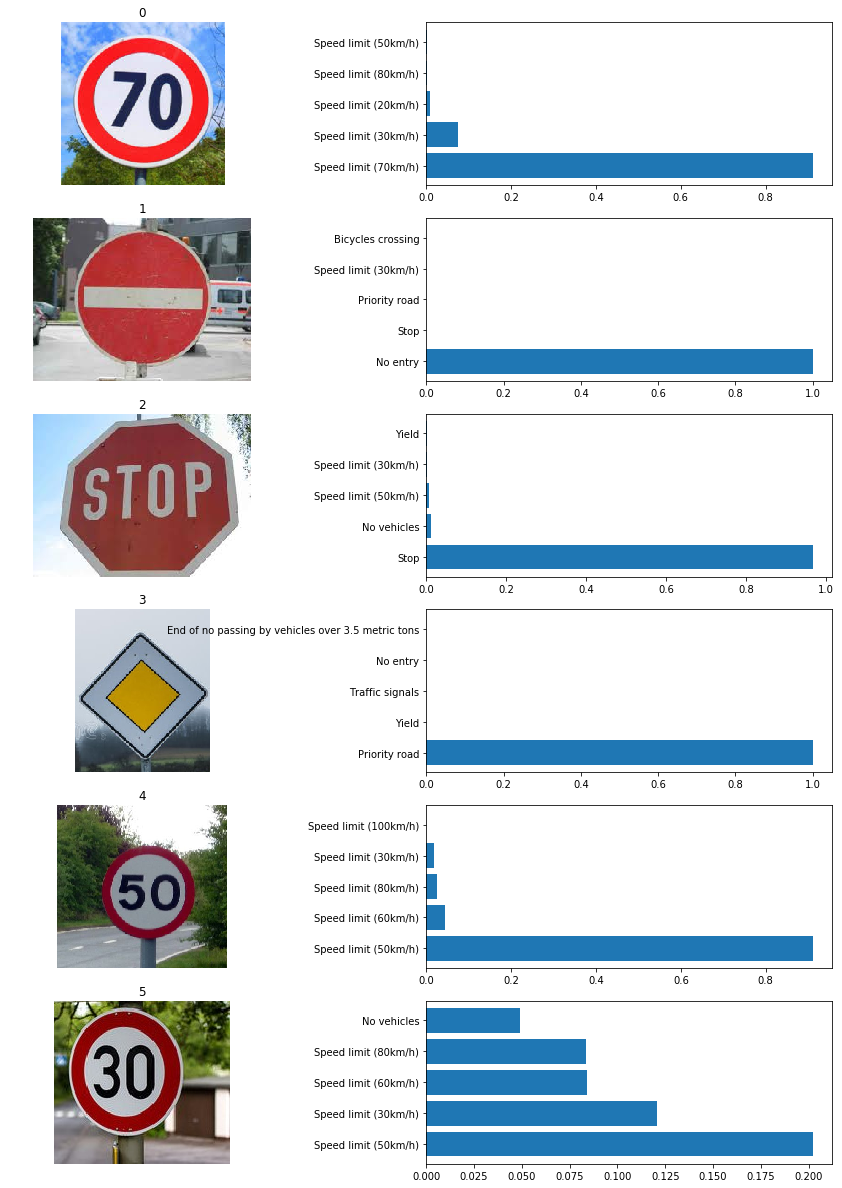

In [25]:
plt.figure(figsize=(16, 21))
for i in range(len(test_images)):
    plt.subplot(int(len(test_images)), 2, 2*i+1)
    plt.imshow(test_images[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(int(len(test_images)), 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signs_class[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [57]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")